In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam

# Step 1: Load the data
df = pd.read_csv('CityTempsLatLng.csv', nrows=2000)
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Set 'date' column as index
df.set_index('date', inplace=True)

# Keep only 'AvgTemperature' column
df = df[['AvgTemperature']]


In [2]:
df


,AvgTemperature
date,
1995-01-01,64.2
1995-01-02,49.4
1995-01-03,48.8
1995-01-04,46.4
1995-01-05,47.9
...,...
2000-06-27,76.6
2000-06-28,79.1
2000-06-29,76.4


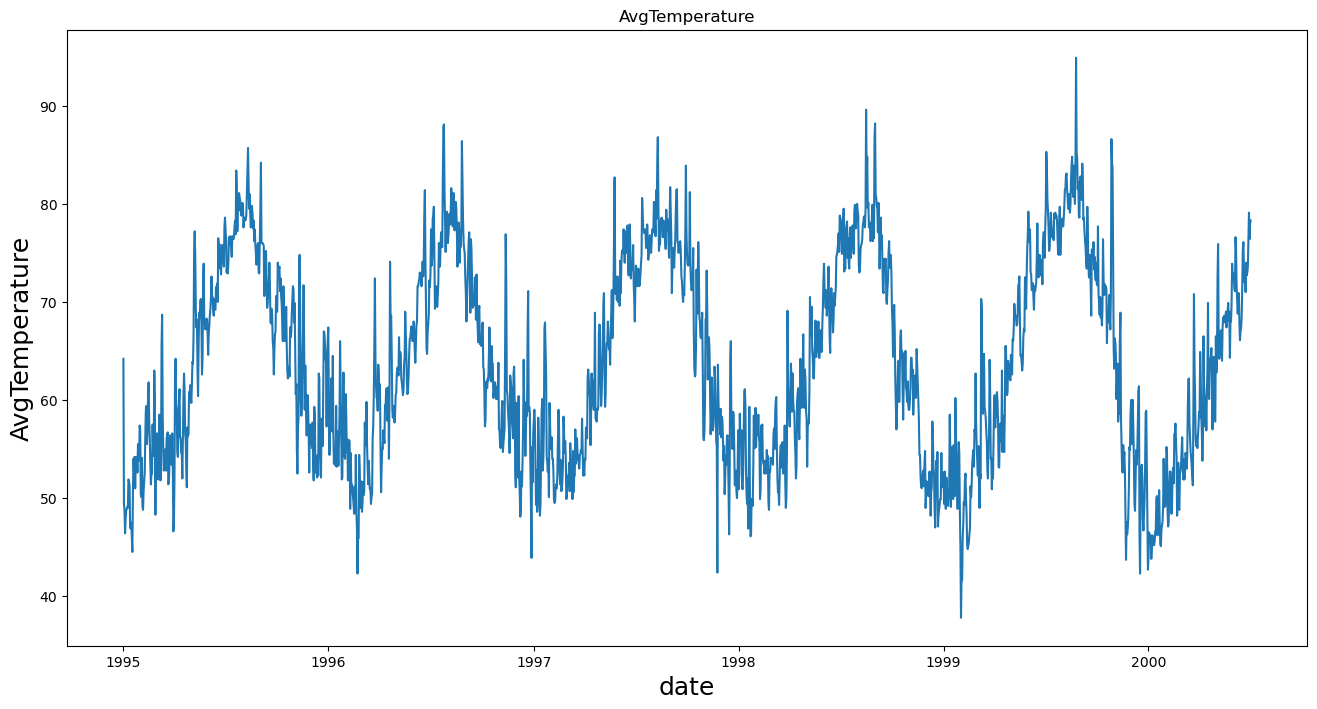

In [3]:
import matplotlib.pyplot as plt
data = df
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('AvgTemperature')
plt.plot(data)
plt.xlabel('date', fontsize=18)
plt.ylabel('AvgTemperature', fontsize=18)
plt.show()


In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the data
data = df.reset_index()
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

# Prepare the training data
def prepare_data(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 300  # Number of previous days to use as input for prediction
X_train, y_train = prepare_data(train_data, window_size)
X_test, y_test = prepare_data(test_data, window_size)

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(window_size, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
predicted_data = model.predict(X_test)

# Inverse transform the data
predicted_data = scaler.inverse_transform(predicted_data)

# Forecast for the next year
last_data = scaled_data[-window_size:]
next_year_data = []
for _ in range(365):
    next_day = model.predict(np.array([last_data]))
    next_year_data.append(next_day[0])
    last_data = np.append(last_data[1:], next_day, axis=0)

# Inverse transform the forecasted data
next_year_data = scaler.inverse_transform(next_year_data)

# Create a date range for the next year
start_date = data.index[-1] + pd.DateOffset(days=1)
end_date = start_date + pd.DateOffset(years=1)
date_range = pd.date_range(start=start_date, end=end_date, closed='left')

# Create a DataFrame with the forecasted data
forecast = pd.DataFrame({'date': date_range, 'AvgTemperature': next_year_data.flatten()})
forecast = forecast.set_index('date')

# Print the forecasted data
print(forecast)


Epoch 1/50
41/41 [==============================] - 5s 92ms/step - loss: 0.0309
Epoch 2/50
41/41 [==============================] - 4s 88ms/step - loss: 0.0061
Epoch 3/50
41/41 [==============================] - 4s 91ms/step - loss: 0.0056
Epoch 4/50
41/41 [==============================] - 4s 105ms/step - loss: 0.0054
Epoch 5/50
41/41 [==============================] - 4s 94ms/step - loss: 0.0053
Epoch 6/50
41/41 [==============================] - 4s 90ms/step - loss: 0.0055
Epoch 7/50
41/41 [==============================] - 4s 89ms/step - loss: 0.0053
Epoch 8/50
41/41 [==============================] - 4s 96ms/step - loss: 0.0052
Epoch 9/50
41/41 [==============================] - 4s 108ms/step - loss: 0.0051
Epoch 10/50
41/41 [==============================] - 4s 100ms/step - loss: 0.0051
Epoch 11/50
41/41 [==============================] - 4s 100ms/step - loss: 0.0051
Epoch 12/50
41/41 [==============================] - 3s 84ms/step - loss: 0.0048
Epoch 13/50
41/41 [==============

1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 24ms/step
            AvgTemperature
date                      
2000-07-02       76.573280
2000-07-03       75.254793
2000-07-04       74.510393
2000-07-05       74.161923
2000-07-06       74.011682
...                    ...
2001-06-27       56.689898
2001-06-28       56.688389
2001-06-29       56.686886
2001-06-30       56.685390
2001-07-01       56.683889

[365 rows x 1 columns]


C:\Users\Yousi\AppData\Local\Temp\ipykernel_24456\3985844559.py:62: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  date_range = pd.date_range(start=start_date, end=end_date, closed='left')


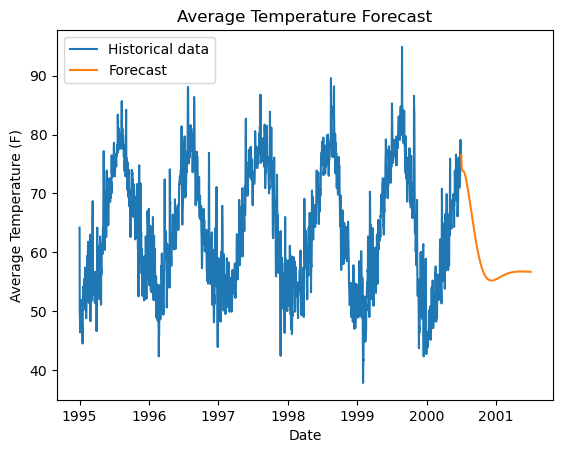

In [5]:
import matplotlib.pyplot as plt

# Plot the historical data
plt.plot(data.index, data['AvgTemperature'], label='Historical data')

# Plot the forecasted data
plt.plot(forecast.index, forecast['AvgTemperature'], label='Forecast')

# Set plot title and axis labels
plt.title('Average Temperature Forecast')
plt.xlabel('Date')
plt.ylabel('Average Temperature (F)')

# Add legend to the plot
plt.legend()

# Show the plot
plt.show()


Epoch 1/50
22/22 [==============================] - 5s 168ms/step - loss: 0.3586 - val_loss: 0.1865
Epoch 2/50
22/22 [==============================] - 3s 147ms/step - loss: 0.1754 - val_loss: 0.1620
Epoch 3/50
22/22 [==============================] - 3s 150ms/step - loss: 0.1618 - val_loss: 0.1630
Epoch 4/50
22/22 [==============================] - 3s 155ms/step - loss: 0.1565 - val_loss: 0.1524
Epoch 5/50
22/22 [==============================] - 3s 149ms/step - loss: 0.1529 - val_loss: 0.1469
Epoch 6/50
22/22 [==============================] - 3s 146ms/step - loss: 0.1481 - val_loss: 0.1496
Epoch 7/50
22/22 [==============================] - 3s 148ms/step - loss: 0.1436 - val_loss: 0.1421
Epoch 8/50
22/22 [==============================] - 3s 146ms/step - loss: 0.1385 - val_loss: 0.1306
Epoch 9/50
22/22 [==============================] - 3s 151ms/step - loss: 0.1310 - val_loss: 0.1234
Epoch 10/50
22/22 [==============================] - 4s 166ms/step - loss: 0.1254 - val_loss: 0.1259

1/1 [==============================] - 0s 23ms/step


1/1 [==============================] - 0s 33ms/step


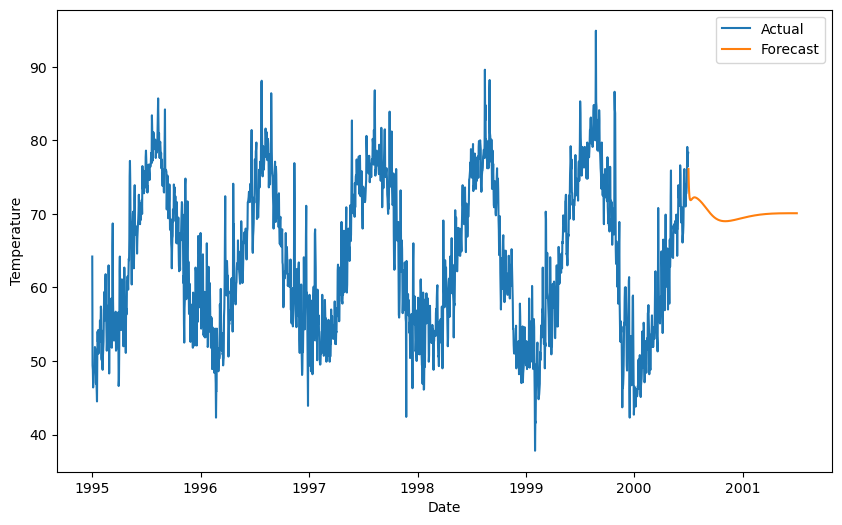

In [6]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Load the dataset

# Convert the date column to day of the year
df['day_of_year'] = df.index.dayofyear

# Normalize the temperature column
scaler = StandardScaler()
df['temp_normalized'] = scaler.fit_transform(df['AvgTemperature'].values.reshape(-1, 1))

# Define the sequence length
seq_length = 300

# Prepare the input/output data
X = []
y = []
for i in range(seq_length, len(df)):
    X.append(df.iloc[i-seq_length:i]['temp_normalized'].values)
    y.append(df.iloc[i]['temp_normalized'])
X = np.array(X)
y = np.array(y)

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# Define the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the LSTM model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=64)

# Use the LSTM model to forecast the temperature for the next year
forecast = []
last_sequence = X[-1]
for i in range(366):
    next_pred = model.predict(last_sequence.reshape(1, seq_length, 1))
    forecast.append(next_pred[0][0])
    last_sequence = np.concatenate([last_sequence[1:], next_pred.reshape(1)])

# Denormalize the forecasted temperature values
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

# Create a new dataframe for the forecasted temperature
# Create a new dataframe for the forecasted temperature
date_range = pd.date_range(start=df.index[-1]+pd.Timedelta(days=1), end=df.index[-1]+pd.Timedelta(days=366), freq='D')
forecast_df = pd.DataFrame({'AvgTemperature': forecast.reshape(-1)}, index=date_range)

# Plot the forecasted temperature
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['AvgTemperature'], label='Actual')
plt.plot(forecast_df.index, forecast_df['AvgTemperature'], label='Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()
